# 4.10 Coding Etiqutte and Excel Reporting

# Table of Contents for this Script
# 1. Import Libraries and Data
# 2. Consider security implications
# 3. Create regional segmentation of data
# 4. Create an exclusion flag for low activity customers
# 5. Create a profiling variable based on age, income, certain goods in the 'department_id' column, and number of dependents
# 6. Create an apprpriate vizualizations to show the distribution of profiles
# 7. Aggregate the max, mean, and min variables for usage frequency and expenditure
# 8. Compare customer profile with regions and departments
# 9. Produce suitable charts to illustrate results

# 01 Import libraries and data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data and create path
path = r'C:\Users\Spero\Documents\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_cus_merged.pkl'))

#  02 consider security implications

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-fruquent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# The data merged from the customer data set has PII data including names and salary.

# 03 Create regional Segmantation of the data. Determine whether there is a difference in spending habits between the different US regions.

In [5]:
# create regions based off the region list provided
Region = []
for value in df['state']:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        Region.append('North East')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        Region.append('Midwest')
    elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        Region.append('South')
    else:
        Region.append('West')

In [6]:
#creation column for region and assigning the Region list values to it
df['region'] = Region

In [7]:
#checking to see if new region column has been added properly
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [8]:
len(df['region'])

32404859

# Determine wether there's a difference in spending habbits between the different U.S. regions. 

In [9]:
# cross spender_flag and region variables
pd.crosstab(df['spender_flag'], df['region'])

region,Midwest,North East,South,West
spender_flag,,,,
High spender,155975,94768,209691,173811
Low spender,7441350,5016243,10582194,8730827


# 04. Create an exclusion flag for low-activity customers (less than five orders) and exclude them from the data.

In [10]:
# create activity exclusion flag
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low_activity'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'high_activity'

In [11]:
df['activity_flag'].value_counts(dropna = False)

high_activity    30964564
low_activity      1440295
Name: activity_flag, dtype: int64

In [12]:
# creatind dataframe without low_activity customers
df2 = df.drop(df[df.max_order < 5].index)

In [13]:
df2.shape

(30964564, 37)

In [14]:
#exporting new dataframe
df2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_active_customers.pkl'))

# 05. Create a profiling variable based on age, income, certain goods in the 'department_id' column, and number of dependents

In [15]:
#create a flag for customers with a family 
#by using department 18 because it contains baby products and no of dependents we can determine if families have younger children, older children, or no children
df2.loc[(df['department_id']==18)&(df['no_of_dependents']>0), 'family_status'] = 'family with young children'
df2.loc[(df['department_id']!=18)&(df['no_of_dependents']>0), 'family_status'] = 'family with older children'
df2.loc[df['no_of_dependents']==0, 'family_status'] = 'no children'

In [16]:
df2['family_status'].value_counts()

family with older children    22917819
no children                    7739681
family with young children      307064
Name: family_status, dtype: int64

In [17]:
#checking to see if number of entries matches dataframe
len(df2['family_status'])

30964564

In [18]:
len(df2)

30964564

In [19]:
# create a flag for vegetarian status
# dpartments 12 meat and seafood and 20 deli which usually contain meat and seafood are not vegetarian 
result2 = []
for value in df2['department_id']:
    if value in (12,20):
        result2.append('not vegetarian')
    else:
        result2.append('vegetarian')

In [20]:
df2['vegetarian_status']=result2

In [21]:
df2['vegetarian_status'].value_counts()

vegetarian        29285949
not vegetarian     1678615
Name: vegetarian_status, dtype: int64

In [22]:
# create a cloumn for age categories
df2.loc[(df2['age']>=18)&(df2['age']<=29), 'age_category']= 'young adult'
df2.loc[(df2['age']>=30)&(df2['age']<=45), 'age_category']= 'middle age adult'
df2.loc[(df2['age']>=46)&(df2['age']<=59), 'age_category']= 'older adult'
df2.loc[df2['age']>60, 'age_category']= 'senior'

In [23]:
df2['age_category'].value_counts()

senior              10112607
middle age adult     7749454
older adult          6823003
young adult          5817603
Name: age_category, dtype: int64

# Grouping and aggregating

In [24]:
# create a frequency column based on days_since_prior_order
df2['min_use_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.max)

In [25]:
len(df2['min_use_frequency'])

30964564

In [26]:
df2['max_use_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.min)

In [27]:
len(df2['max_use_frequency'])

30964564

In [28]:
df2['avg_use_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)

In [29]:
len(df2['avg_use_frequency'])

30964564

In [30]:
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,marital_status,income,region,activity_flag,family_status,vegetarian_status,age_category,min_use_frequency,max_use_frequency,avg_use_frequency
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,South,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259
1,2398795,1,2,3,7,15.0,False,196,1,1,...,married,40423,South,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259
2,473747,1,3,3,12,21.0,False,196,1,1,...,married,40423,South,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259
3,2254736,1,4,4,7,29.0,False,196,1,1,...,married,40423,South,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259
4,431534,1,5,4,15,28.0,False,196,1,1,...,married,40423,South,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259


In [31]:
# create an aggregation for customer expendures
df2['max_expendure']=df2.groupby(['user_id'])['prices'].transform(np.max)

In [32]:
df2['min_expendure']=df2.groupby(['user_id'])['prices'].transform(np.min)

In [33]:
df2['avg_expendure']=df2.groupby(['user_id'])['prices'].transform(np.mean)

In [34]:
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,activity_flag,family_status,vegetarian_status,age_category,min_use_frequency,max_use_frequency,avg_use_frequency,max_expendure,min_expendure,avg_expendure
0,2539329,1,1,2,8,NaN,True,196,1,0,...,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259,14.0,1.0,6.367797
1,2398795,1,2,3,7,15.0,False,196,1,1,...,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259,14.0,1.0,6.367797
2,473747,1,3,3,12,21.0,False,196,1,1,...,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259,14.0,1.0,6.367797
3,2254736,1,4,4,7,29.0,False,196,1,1,...,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259,14.0,1.0,6.367797
4,431534,1,5,4,15,28.0,False,196,1,1,...,high_activity,family with older children,vegetarian,middle age adult,30.0,0.0,20.259259,14.0,1.0,6.367797


# Visualizations

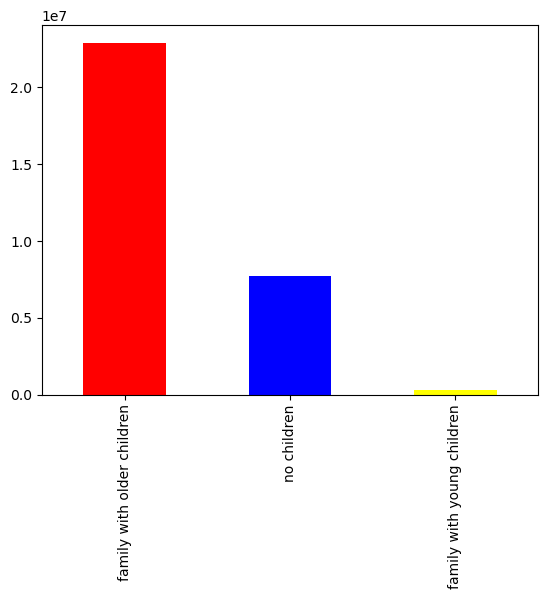

In [35]:
# create a bar chart to show the distribution of the family_status column
family_bar=df2['family_status'].value_counts().plot.bar(color=['red', 'blue', 'yellow'])

# Instacart has more orders from families with older children (dependents who have aged out the baby product department).

In [36]:
# saving the bar chart above
family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_status_bar.png'))

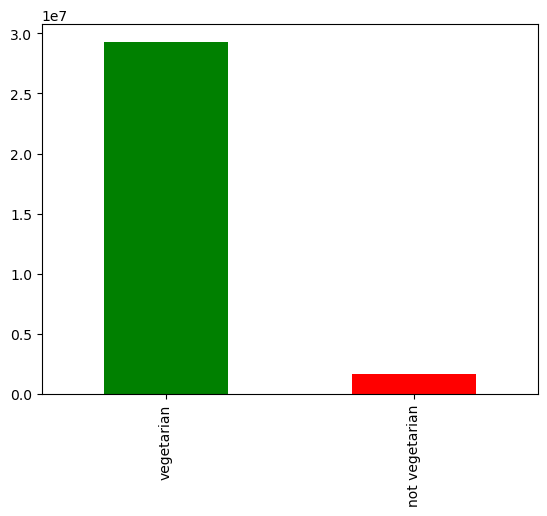

In [37]:
# Create a bar chart from the vegetarian status bar
veggie_status_bar=df2['vegetarian_status'].value_counts().plot.bar(color=['green', 'red'])

# Instacart recieves more orders from vegetarians (those who don't consume meat, seafood, or deli items) than those who do eat meat. Though these orders could be from customers who didn't need to order meat or seafood at the time. More data about these customers would be necessary to fully determine this theory.

In [38]:
# saving the vegetarian status bar chart
veggie_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegetarian_staus_bar.png'))

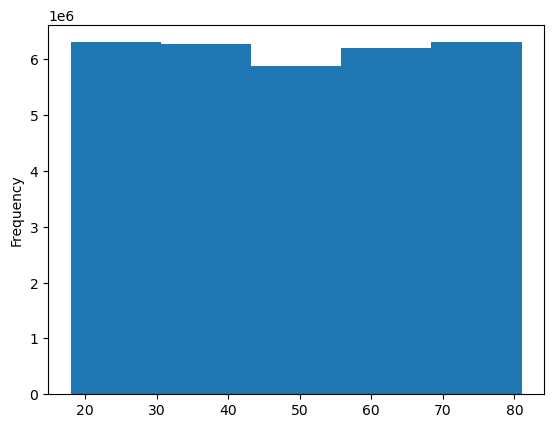

In [39]:
# create a histogram using the age column
age_hist=df2['age'].plot.hist(bins=5)

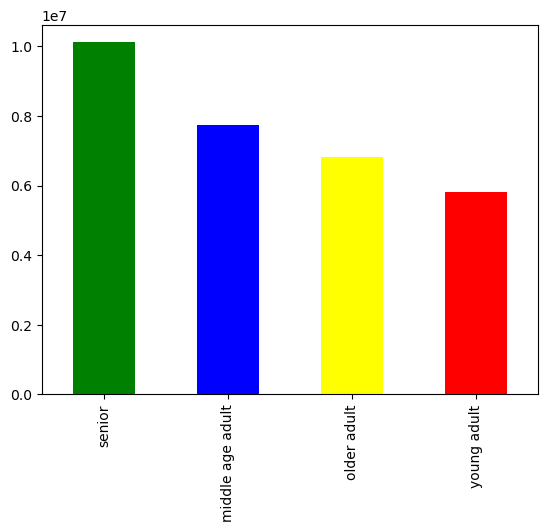

In [40]:
# create  bar chart using the age_category column
age_cat_bar=df2['age_category'].value_counts().plot.bar(color=['green', 'blue', 'yellow', 'red'])

# as you can see in both the histogram and the bar chart above Instacarts orders come from mostly middle age adults and seniors (30-45, 60 and above)

In [41]:
#saving histogram as png
age_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_hist.png'))

In [42]:
#saving age_category bar chart
age_cat_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_cat_bar.png'))

In [43]:
crosstab_spender_region = pd.crosstab(df2['region'], df2['spender_flag'], dropna=False)

In [44]:
crosstab_spender_region

spender_flag,High spender,Low spender
region,,
Midwest,148678,7112835
North East,90144,4792287
South,199339,10111800
West,165264,8344217


In [45]:
# Crosstuabulate customer family status by region
crosstab_family_status=pd.crosstab(df2['region'],df2['family_status'], dropna=False)

In [46]:
crosstab_family_status

family_status,family with older children,family with young children,no children
region,,,
Midwest,5367664,71033,1822816
North East,3619508,48037,1214886
South,7624975,104231,2581933
West,6305672,83763,2120046


In [47]:
#Crosstab for vegetarian status by region
crosstab_vegetarian_status=pd.crosstab(df2['region'],df2['vegetarian_status'], dropna=False)

In [48]:
crosstab_vegetarian_status

vegetarian_status,not vegetarian,vegetarian
region,,
Midwest,392724,6868789
North East,266700,4615731
South,557740,9753399
West,461451,8048030


In [49]:
#Crosstab for age_category by region
crosstab_age_cat=pd.crosstab(df2['region'],df2['age_category'], dropna=False)

In [50]:
crosstab_age_cat

age_category,middle age adult,older adult,senior,young adult
region,,,,
Midwest,1828392,1621840,2356770,1355838
North East,1202918,1069917,1624331,919419
South,2615609,2213458,3361229,1960651
West,2102535,1917788,2770277,1581695


In [75]:
# crosstab for loyalty_flag by region
crosstab_loyalty_spender=pd.crosstab(df2['loyalty_flag'], df2['spender_flag'], dropna=False)

In [76]:
crosstab_loyalty_spender

spender_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84011,4719684
Regular customer,302814,15573962


# Creating Appropiate visualizations for analysis

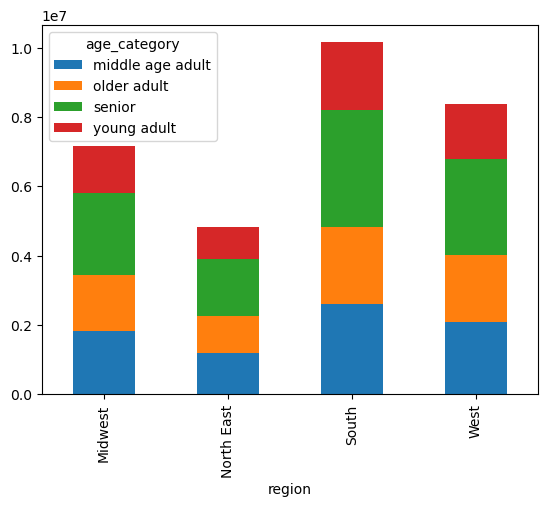

In [53]:
bar2 = crosstab_age_cat.plot(kind= 'bar', stacked = True)

In [54]:
#saving bar chart for age category distrubution by reagion
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_chart.png'))

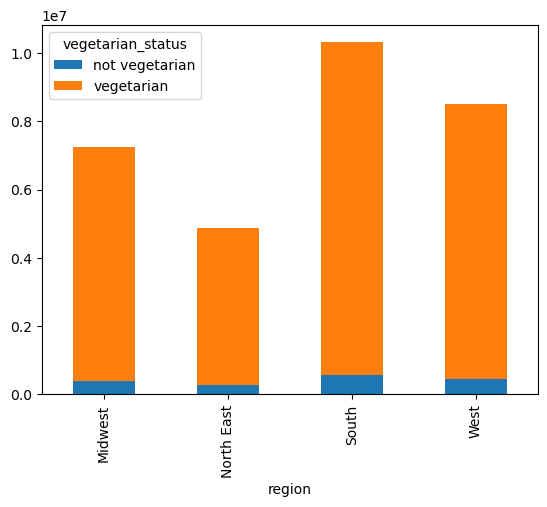

In [55]:
bar3 = crosstab_vegetarian_status.plot(kind= 'bar', stacked = True)

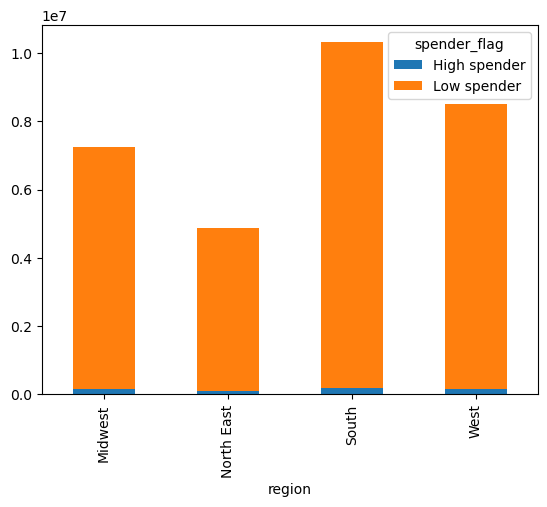

In [69]:
bar4 = crosstab_spender_region.plot(kind= 'bar', stacked=True)

In [57]:
#saving spender_region chart and vegetarian by region chart
bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veggie_region.png'))
bar4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_region_chart.png'))

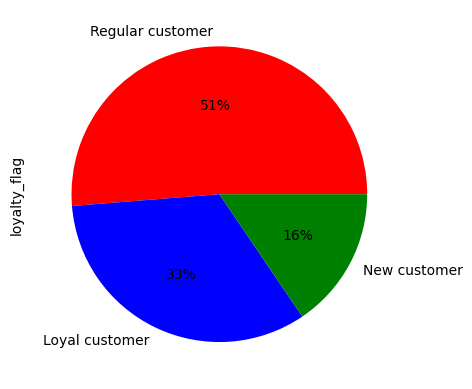

In [64]:
# creating pie chart to show distribution among customer loyalty
pie1 = df2['loyalty_flag'].value_counts().plot.pie(y= 'loyalty_flag', autopct=('%1.f%%'), colors=['red', 'blue', 'green'])

In [65]:
#saving pie chart
pie1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_pie_chart.png'))

In [77]:
df2['family_status'].value_counts()

family with older children    22917819
no children                    7739681
family with young children      307064
Name: family_status, dtype: int64

In [86]:
# To see how much on average each group in family_status spends
df2.groupby('family_status')['avg_expendure'].mean()

family_status
family with older children    7.790423
family with young children    7.829417
no children                   7.789552
Name: avg_expendure, dtype: float64

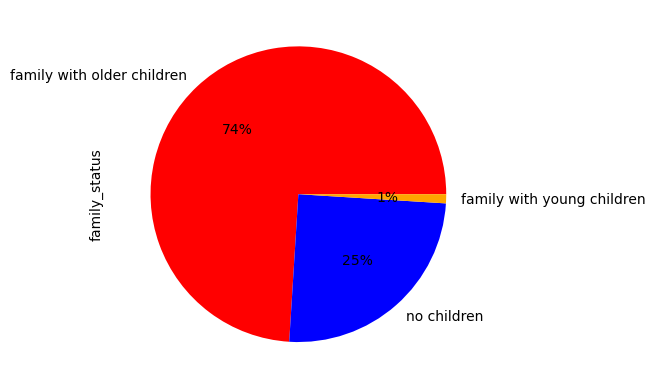

In [82]:
#create pie chart for family status and ordering connection
pie2 =df2['family_status'].value_counts().plot.pie(y= 'family_status', autopct=('%1.f%%'), colors=['red', 'blue', 'orange'])

In [83]:
#saving pie chart
pie2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_status_pie.png'))

In [87]:
#To see how much on average each group in age_category spends
df2.groupby('age_category')['avg_expendure'].mean()

age_category
middle age adult    7.791948
older adult         7.788695
senior              7.796140
young adult         7.782193
Name: avg_expendure, dtype: float64

In [88]:
#To see how much on average Vegetarians spend vs. non-vegetarians
df2.groupby('vegetarian_status')['avg_expendure'].mean()

vegetarian_status
not vegetarian    7.920181
vegetarian        7.783164
Name: avg_expendure, dtype: float64

In [91]:
df2.shape

(30964564, 46)

In [90]:
df2.to_pickle(os.path.join(path, '02 Data', 'Prepared data', 'final_project_dataset'))